In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df_explo = pd.read_csv("../cpp/cplx_220416.txt")

In [4]:
df_explo["duration_s"] = df_explo["duration"]/1000

In [5]:
df_header = pd.read_csv("../task_cplx_header.csv")
df_header = df_header.drop("Unnamed: 0", axis=1)

In [6]:
df = df_explo.merge(df_header, left_on="tid", right_on="ts_id")

In [7]:
df["n_task"] = df["nbt"]

In [8]:
s = df["U"]<0.6
s &= df["schedulable"]==0
df.loc[s]

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s,ts_id,U,nbt,n_task


In [9]:
df["mode"] = df["task_type"] + " - " + df["search_type"]

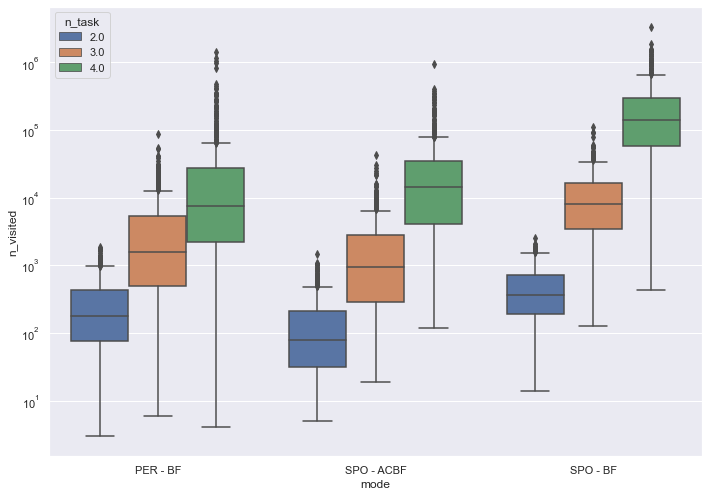

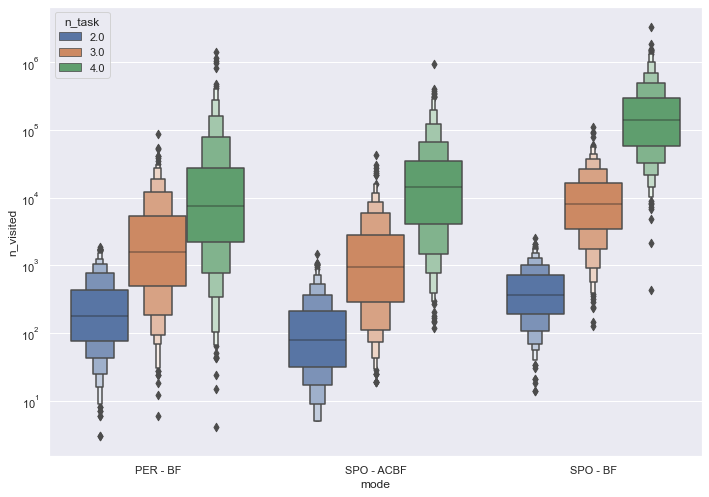

In [10]:
g=sns.boxplot(data=df, y="n_visited", hue="n_task", x="mode")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df, y="n_visited", hue="n_task", x="mode")
g.set_yscale("log")
plt.show()

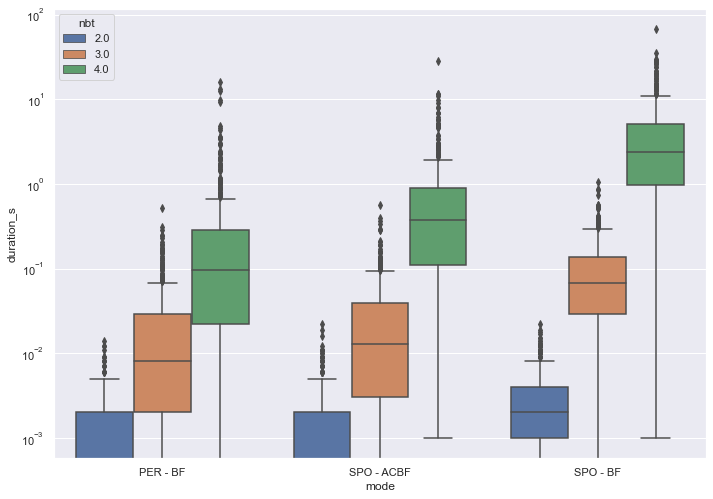

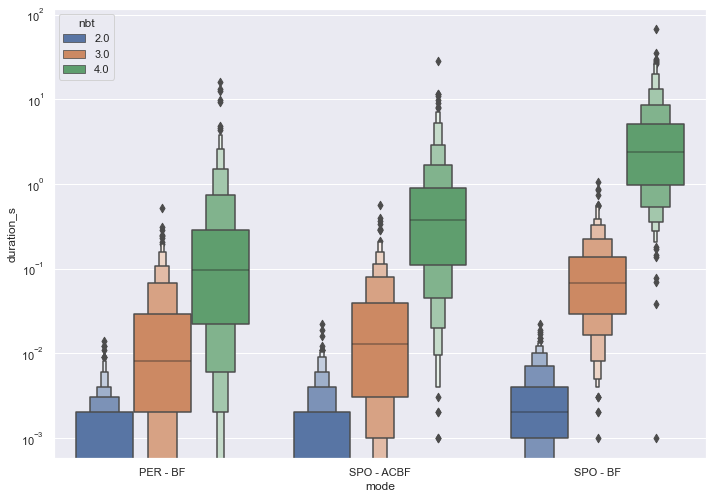

In [11]:
g=sns.boxplot(data=df, y="duration_s", hue="nbt", x="mode")
g.set_yscale("log")
plt.show()

g=sns.boxenplot(data=df, y="duration_s", hue="nbt", x="mode")
g.set_yscale("log")
plt.show()

In [12]:
df_piv = df.pivot(index="tid", columns="mode", values=["duration_s", "n_visited", "schedulable"])
df_piv

duration_s                     n_visited                       \
mode   PER - BF SPO - ACBF SPO - BF  PER - BF SPO - ACBF  SPO - BF   
tid                                                                  
0         0.000      0.001    0.001      40.0      101.0     198.0   
1         0.000      0.000    0.000      69.0       62.0     109.0   
2         0.000      0.000    0.001     183.0       43.0     214.0   
3         0.000      0.000    0.001     217.0       58.0     254.0   
4         0.000      0.002    0.001      68.0       95.0     170.0   
...         ...        ...      ...       ...        ...       ...   
1495      2.072      0.448    4.598  232377.0    18138.0  281681.0   
1496      0.304      0.120    3.423   34227.0     5765.0  245212.0   
1497      0.002      0.029    0.568     480.0     1280.0   31252.0   
1498      0.010      2.269    6.388    1651.0    86844.0  336436.0   
1499      0.091      0.035    0.462    6529.0     1149.0   27317.0   

     schedulable                      
mode    PER - BF SPO - ACBF SPO - BF  
tid                                   
0            1.0        1.0      1.0  
1            1.0        1.0      1.0  
2            1.0        1.0      1.0  
3            1.0        1.0      1.0  
4            1.0        1.0      1.0  
...          ...        ...      ...  
1495         1.0        1.0      1.0  
1496         1.0        1.0      1.0  
1497         1.0        1.0      1.0  
1498         1.0        1.0      1.0  
1499         1.0        1.0      1.0  

[1500 rows x 9 columns]

In [13]:
df_piv[("n_visited", "SPO - BF")]

tid
0          198.0
1          109.0
2          214.0
3          254.0
4          170.0
          ...   
1495    281681.0
1496    245212.0
1497     31252.0
1498    336436.0
1499     27317.0
Name: (n_visited, SPO - BF), Length: 1500, dtype: float64

In [24]:
tmp.loc[tmp["mode"] =="SPO - BF" ]["duration"].apply(np.log)

2       0.000000
5           -inf
8       0.000000
11      0.000000
14      0.000000
          ...   
4487    8.433377
4490    8.138273
4493    6.342121
4496    8.762177
4499    6.135565
Name: duration, Length: 1500, dtype: float64

/Users/simonpicard/opt/anaconda3/envs/manual-dq-analysis/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

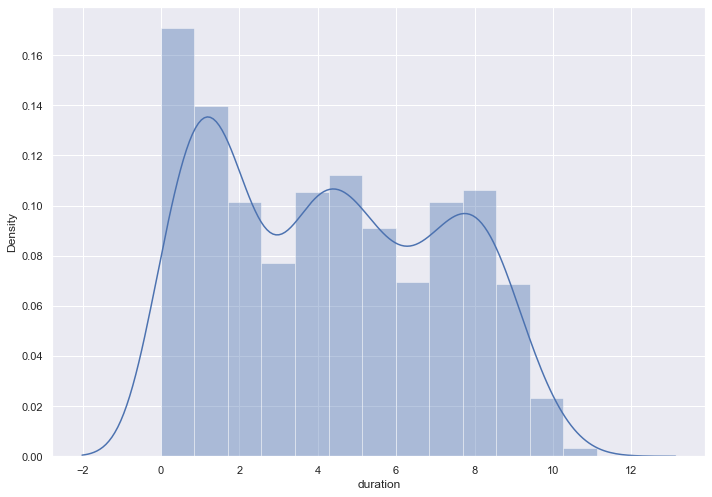

In [25]:
sns.distplot((tmp.loc[tmp["mode"] =="SPO - BF" ]["duration"]+1).apply(np.log))

In [34]:
tmp

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s,ts_id,U,nbt,n_task,mode,"(n_visited, SPO - BF)"
1,0,SPO,ACBF,EDF-VD,1,101,1,15,0.001,0.0,0.687500,2.0,2.0,SPO - ACBF,198.0
2,0,SPO,BF,EDF-VD,1,198,1,25,0.001,0.0,0.687500,2.0,2.0,SPO - BF,198.0
4,1,SPO,ACBF,EDF-VD,1,62,1,20,0.000,1.0,0.616667,2.0,2.0,SPO - ACBF,109.0
5,1,SPO,BF,EDF-VD,1,109,1,21,0.000,1.0,0.616667,2.0,2.0,SPO - BF,109.0
7,2,SPO,ACBF,EDF-VD,1,43,1,24,0.000,2.0,0.334586,2.0,2.0,SPO - ACBF,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,1497,SPO,BF,EDF-VD,1,31252,568,25,0.568,1497.0,0.445076,4.0,4.0,SPO - BF,31252.0
4495,1498,SPO,ACBF,EDF-VD,1,86844,2269,49,2.269,1498.0,0.694444,4.0,4.0,SPO - ACBF,336436.0
4496,1498,SPO,BF,EDF-VD,1,336436,6388,49,6.388,1498.0,0.694444,4.0,4.0,SPO - BF,336436.0
4498,1499,SPO,ACBF,EDF-VD,1,1149,35,14,0.035,1499.0,0.485823,4.0,4.0,SPO - ACBF,27317.0


/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_6310/3504100011.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  tmp = df.loc[df["mode"].isin(["SPO - BF", "SPO - ACBF"])].join(df_piv[("n_visited", "SPO - BF")], on="tid")


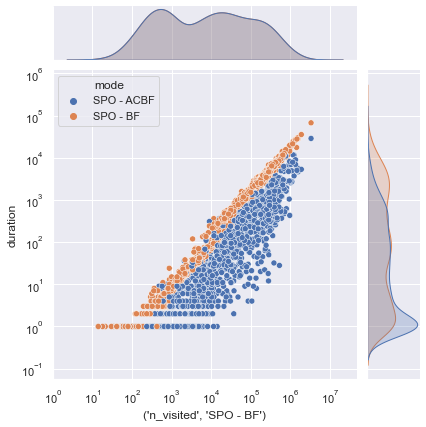

In [37]:
tmp = df.loc[df["mode"].isin(["SPO - BF", "SPO - ACBF"])].join(df_piv[("n_visited", "SPO - BF")], on="tid")
tmp["duration"] = tmp["duration"].apply(lambda x: max(1, x))
tmp["schedulable"] = tmp["schedulable"].apply(lambda x: "yes" if x else "no")

#sns.scatterplot(data=tmp, x=("n_visited", "SPO - BF"), y="duration_s", style="schedulable", hue="mode")
g = sns.jointplot(
    data=tmp, 
    x=("n_visited", "SPO - BF"), 
    y="duration",
    hue="mode",
    marginal_kws={"log_scale":True},
    #joint_kws={"style":"schedulable"}
)

#g.ax_joint.set_xscale('log')
#g.ax_joint.set_yscale('log')

/var/folders/lr/nrx49w_54md3dfrcjb0y_b580000gn/T/ipykernel_6310/4129975583.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  tmp = df.loc[df["mode"].isin(["PER - BF", "SPO - ACBF"])].join(df_piv[("n_visited", "SPO - ACBF")], on="tid")


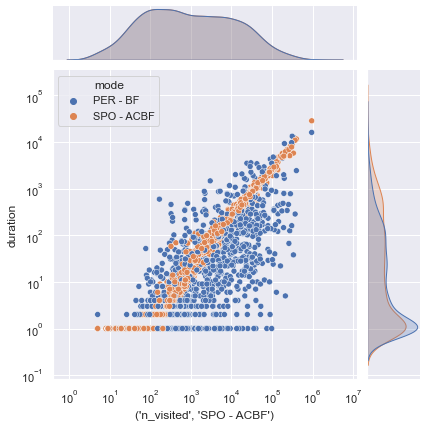

In [39]:
tmp = df.loc[df["mode"].isin(["PER - BF", "SPO - ACBF"])].join(df_piv[("n_visited", "SPO - ACBF")], on="tid")
tmp["duration"] = tmp["duration"].apply(lambda x: max(1, x))

#sns.scatterplot(data=tmp, x=("n_visited", "SPO - ACBF"), y="duration_s", style="schedulable", hue="mode")

g = sns.jointplot(
    data=tmp, 
    x=("n_visited", "SPO - ACBF"), 
    y="duration",
    hue="mode",
    marginal_kws={"log_scale":True},
    #joint_kws={"style":"schedulable"}
)

In [61]:
(df_piv["schedulable"]["SPO - ACBF"]==df_piv["schedulable"]["SPO - BF"]).value_counts()

True    1500
dtype: int64

In [47]:
df_piv.loc[(df_piv["schedulable"]["SPO - AC"]!=df_piv["schedulable"]["SPO - BF"])]

duration                   n_visited                   schedulable  \
mode PER - BF SPO - AC SPO - BF  PER - BF SPO - AC SPO - BF    PER - BF   
tid                                                                       
1214   2662.0   1520.0      NaN  405092.0  90621.0      NaN         1.0   

                        
mode SPO - AC SPO - BF  
tid                     
1214      1.0      NaN

In [64]:
df

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s,ts_id,U,nbt,mode,U_round
0,0,PER,BF,EDF-VD,1,40,0,24,0.000,0.0,0.687500,2.0,PER - BF,0.69
1,0,SPO,ACBF,EDF-VD,1,101,1,15,0.001,0.0,0.687500,2.0,SPO - ACBF,0.69
2,0,SPO,BF,EDF-VD,1,198,1,25,0.001,0.0,0.687500,2.0,SPO - BF,0.69
3,1,PER,BF,EDF-VD,1,69,0,30,0.000,1.0,0.616667,2.0,PER - BF,0.62
4,1,SPO,ACBF,EDF-VD,1,62,0,20,0.000,1.0,0.616667,2.0,SPO - ACBF,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1498,SPO,ACBF,EDF-VD,1,86844,2269,49,2.269,1498.0,0.694444,4.0,SPO - ACBF,0.69
4496,1498,SPO,BF,EDF-VD,1,336436,6388,49,6.388,1498.0,0.694444,4.0,SPO - BF,0.69
4497,1499,PER,BF,EDF-VD,1,6529,91,4620,0.091,1499.0,0.485823,4.0,PER - BF,0.49
4498,1499,SPO,ACBF,EDF-VD,1,1149,35,14,0.035,1499.0,0.485823,4.0,SPO - ACBF,0.49


In [66]:
df.loc[df["schedulable"] == 0].sort_values("U")

,tid,task_type,search_type,scheduler,schedulable,n_visited,duration,depth,duration_s,ts_id,U,nbt,mode,U_round
3202,1067,SPO,ACBF,EDF-VD,0,71292,1685,24,1.685,1067.0,0.658034,4.0,SPO - ACBF,0.66
3201,1067,PER,BF,EDF-VD,0,25069,248,5171,0.248,1067.0,0.658034,4.0,PER - BF,0.66
3203,1067,SPO,BF,EDF-VD,0,334145,5521,24,5.521,1067.0,0.658034,4.0,SPO - BF,0.66
1646,548,SPO,BF,EDF-VD,0,21939,220,63,0.220,548.0,0.691163,3.0,SPO - BF,0.69
1645,548,SPO,ACBF,EDF-VD,0,7690,103,63,0.103,548.0,0.691163,3.0,SPO - ACBF,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,607,SPO,BF,EDF-VD,0,15122,144,17,0.144,607.0,1.000000,3.0,SPO - BF,1.00
1822,607,SPO,ACBF,EDF-VD,0,5829,75,17,0.075,607.0,1.000000,3.0,SPO - ACBF,1.00
1821,607,PER,BF,EDF-VD,0,204,1,21,0.001,607.0,1.000000,3.0,PER - BF,1.00
579,193,PER,BF,EDF-VD,0,34,0,7,0.000,193.0,1.000000,2.0,PER - BF,1.00
